In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Figure 2 - Genetic Algorithm results

In [2]:
runs_num = 10

runs_list = []

for i in range(1,runs_num+1):
    runs_df = pd.read_csv(f'run{i}/quick_analysis_data.csv')
    runs_df['gen_fixed'] = runs_df['gen'] - 1
    runs_list.append(runs_df)
    
runs_df = pd.concat([x for x in runs_list]).reset_index(drop=True)
runs_df.head()

,gen,min_gap,max_gap,avg_gap,spearman,gen_fixed
0,1,0.130027,2.461099,1.184755,NaN,0
1,2,0.043864,1.874063,0.811130,0.632887,1
2,3,0.013851,1.842103,0.571869,0.548022,2
3,4,0.013851,1.389164,0.470893,0.633092,3
4,5,0.013851,0.892852,0.336714,0.591489,4


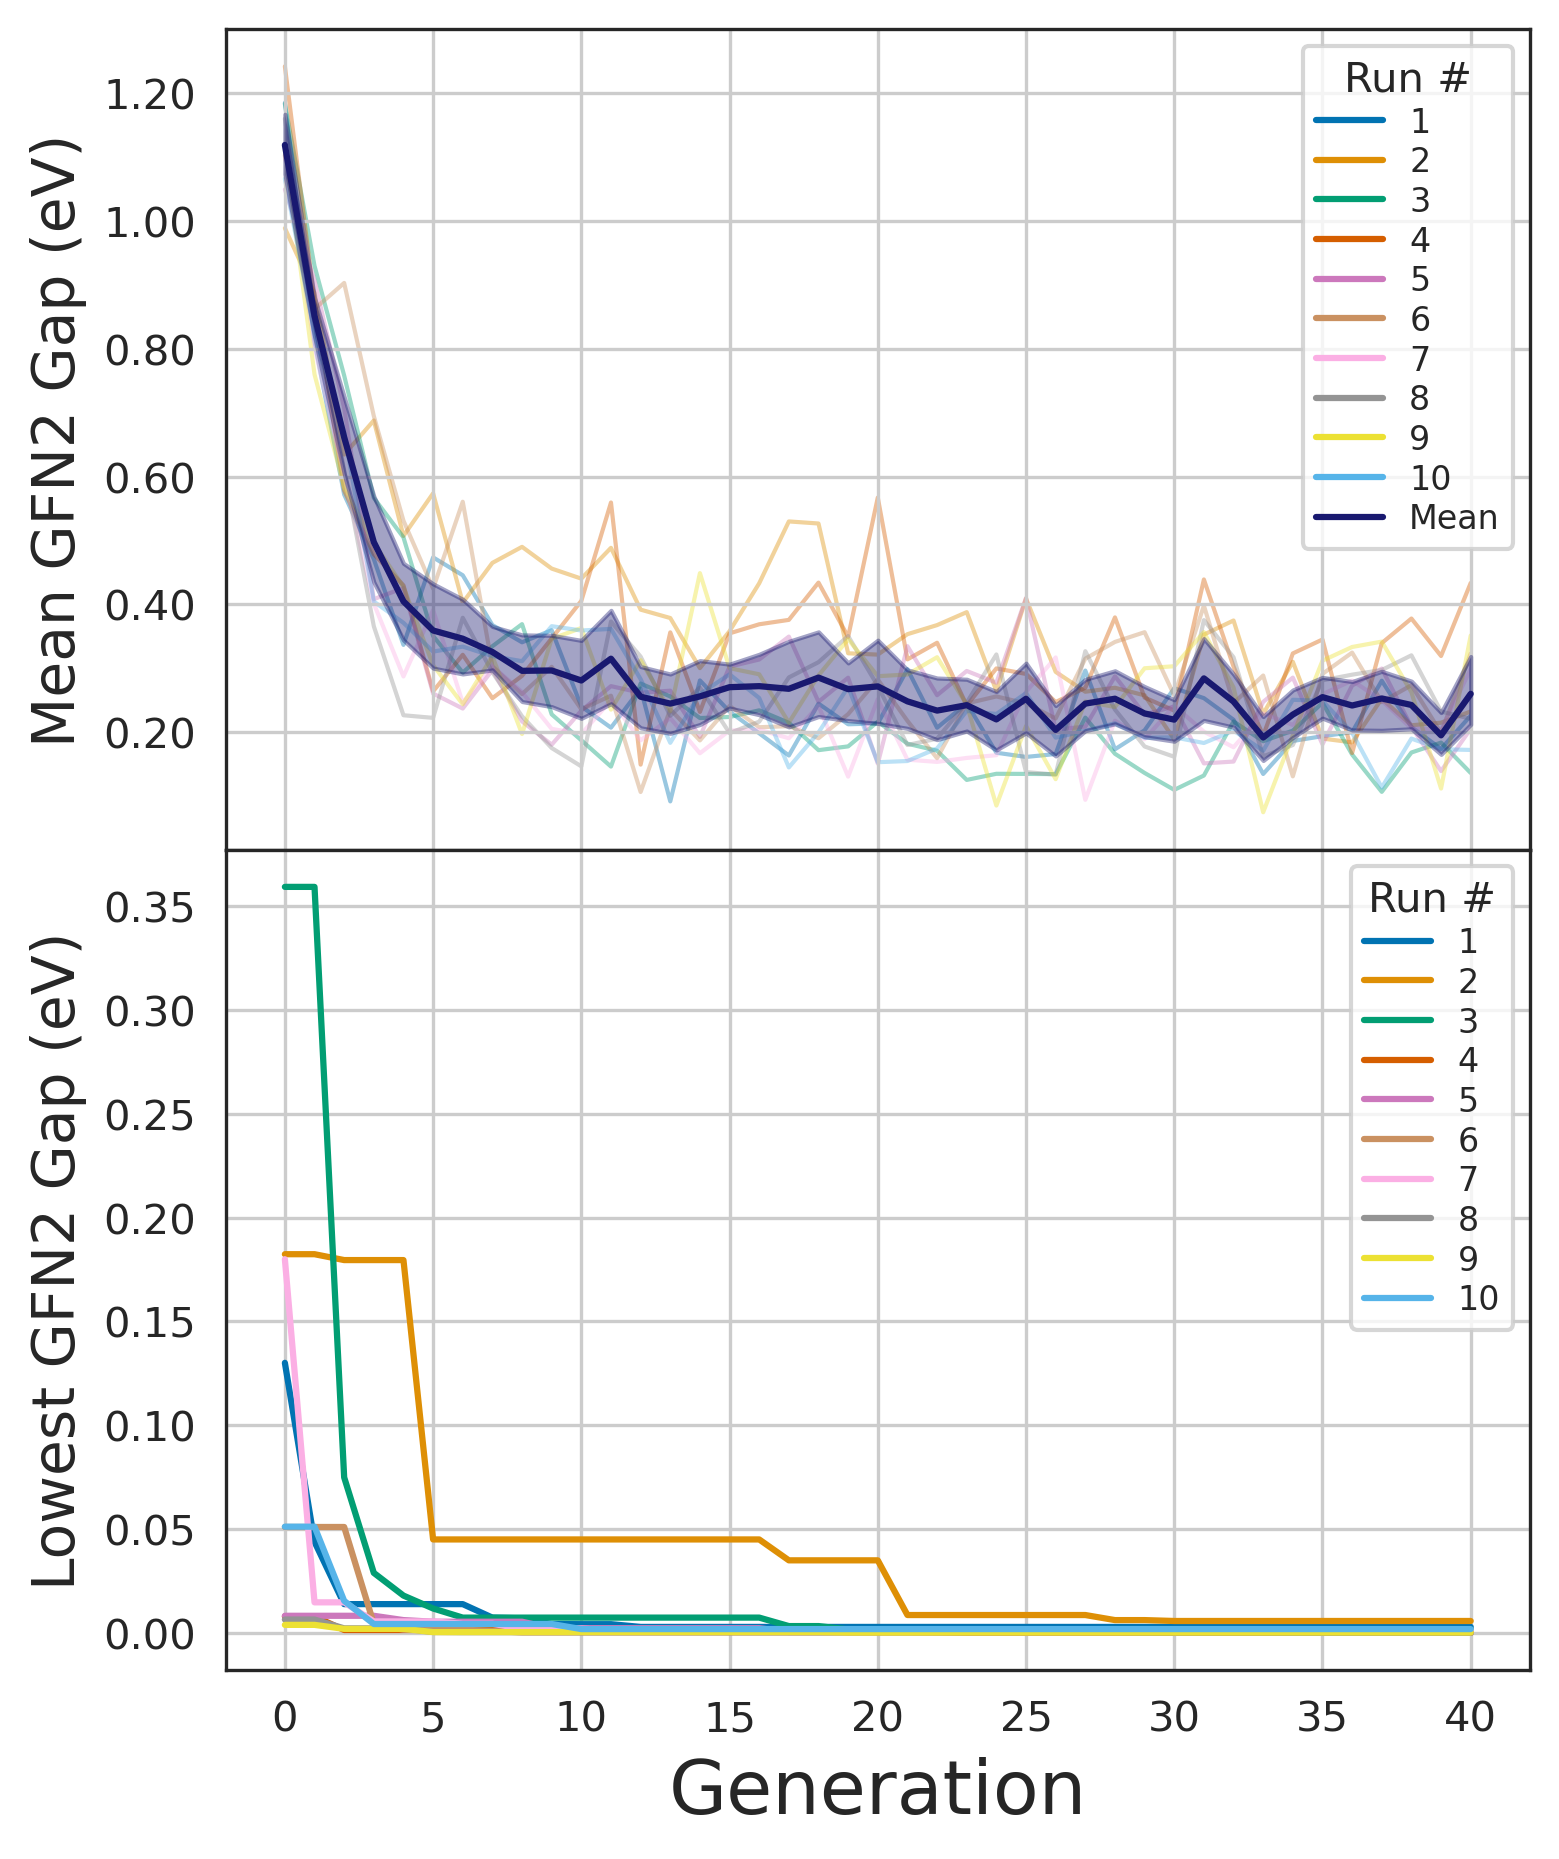

In [19]:
fig, ax = plt.subplots(2, 1, figsize = (5,6), dpi = 300,  facecolor='w', edgecolor='k', sharex=True)
sns.set_style("white")
sns.set_palette("colorblind")
for i, run in enumerate(runs_list):
    #run['gen_fixed'] = run['gen'] - 1
    sns.lineplot(data = run, x='gen_fixed', y = 'avg_gap', ax = ax[0], label = str(i+1), alpha = 0.4, zorder = -1, lw = 1)

sns.lineplot(data = runs_df, x='gen_fixed', y = 'avg_gap', ax = ax[0], err_style='band', label = 'Mean', color = 'midnightblue', zorder = 2, err_kws={'alpha':0.4})

for i, run in enumerate(runs_list):
    #run['gen_fixed'] = run['gen'] - 1
    sns.lineplot(data = run, x='gen_fixed', y = 'min_gap', ax = ax[1], label = str(i+1))

ax[0].grid(which='major')
ax[1].grid(which='major')
ax[1].set_xlabel('Generation', fontsize = 18)
ax[0].set_ylabel('Mean GFN2 Gap (eV)', fontsize = 14)
ax[1].set_ylabel('Lowest GFN2 Gap (eV)', fontsize = 14)

ax[0].yaxis.set_major_formatter('{x:0<4.1f}')
leg1 = ax[1].legend(fontsize = 8, title = 'Run #', labelspacing = 0.2)
leg2 = ax[0].legend(fontsize = 8, title = 'Run #', loc=1, labelspacing = 0.2)

for lh in leg2.legendHandles: 
    lh.set_alpha(1)
    lh.set_linewidth(1.5)

plt.tight_layout(pad=0)
plt.savefig('../figures/quick_analysis_10runs_both_mean.png')
plt.show()

# Figure 3 - Common monomers

In [10]:
runs_num = 10

runs_df = pd.DataFrame()

for i in range(1,runs_num+1):
    runs_df = pd.concat([runs_df, pd.read_csv(f'run{i}/full_analysis_data.csv')])

runs_df[['m1','m2', 'seq']] = runs_df['filename'].str.split('_', expand=True)
runs_df = runs_df.reset_index(drop=True)
runs_df = runs_df.drop_duplicates(subset = 'filename')
runs_df.head()

,run,gen,filename,gap,m1,m2,seq
0,1,1,751_221_01010101,0.130027,751,221,01010101
1,1,1,114_75_01010101,0.142423,114,75,01010101
2,1,1,1145_689_01010101,0.369933,1145,689,01010101
3,1,1,913_625_01010101,0.377617,913,625,01010101
4,1,1,1018_744_01010101,0.381732,1018,744,01010101


In [11]:
monomers_dist = pd.concat([runs_df['m1'].astype('int'), runs_df['m2'].astype('int')]).sort_values().reset_index(drop=True)
monomers_dist

0           0
1           0
2           0
3           0
4           0
         ... 
11977    1223
11978    1224
11979    1224
11980    1224
11981    1224
Length: 11982, dtype: int64

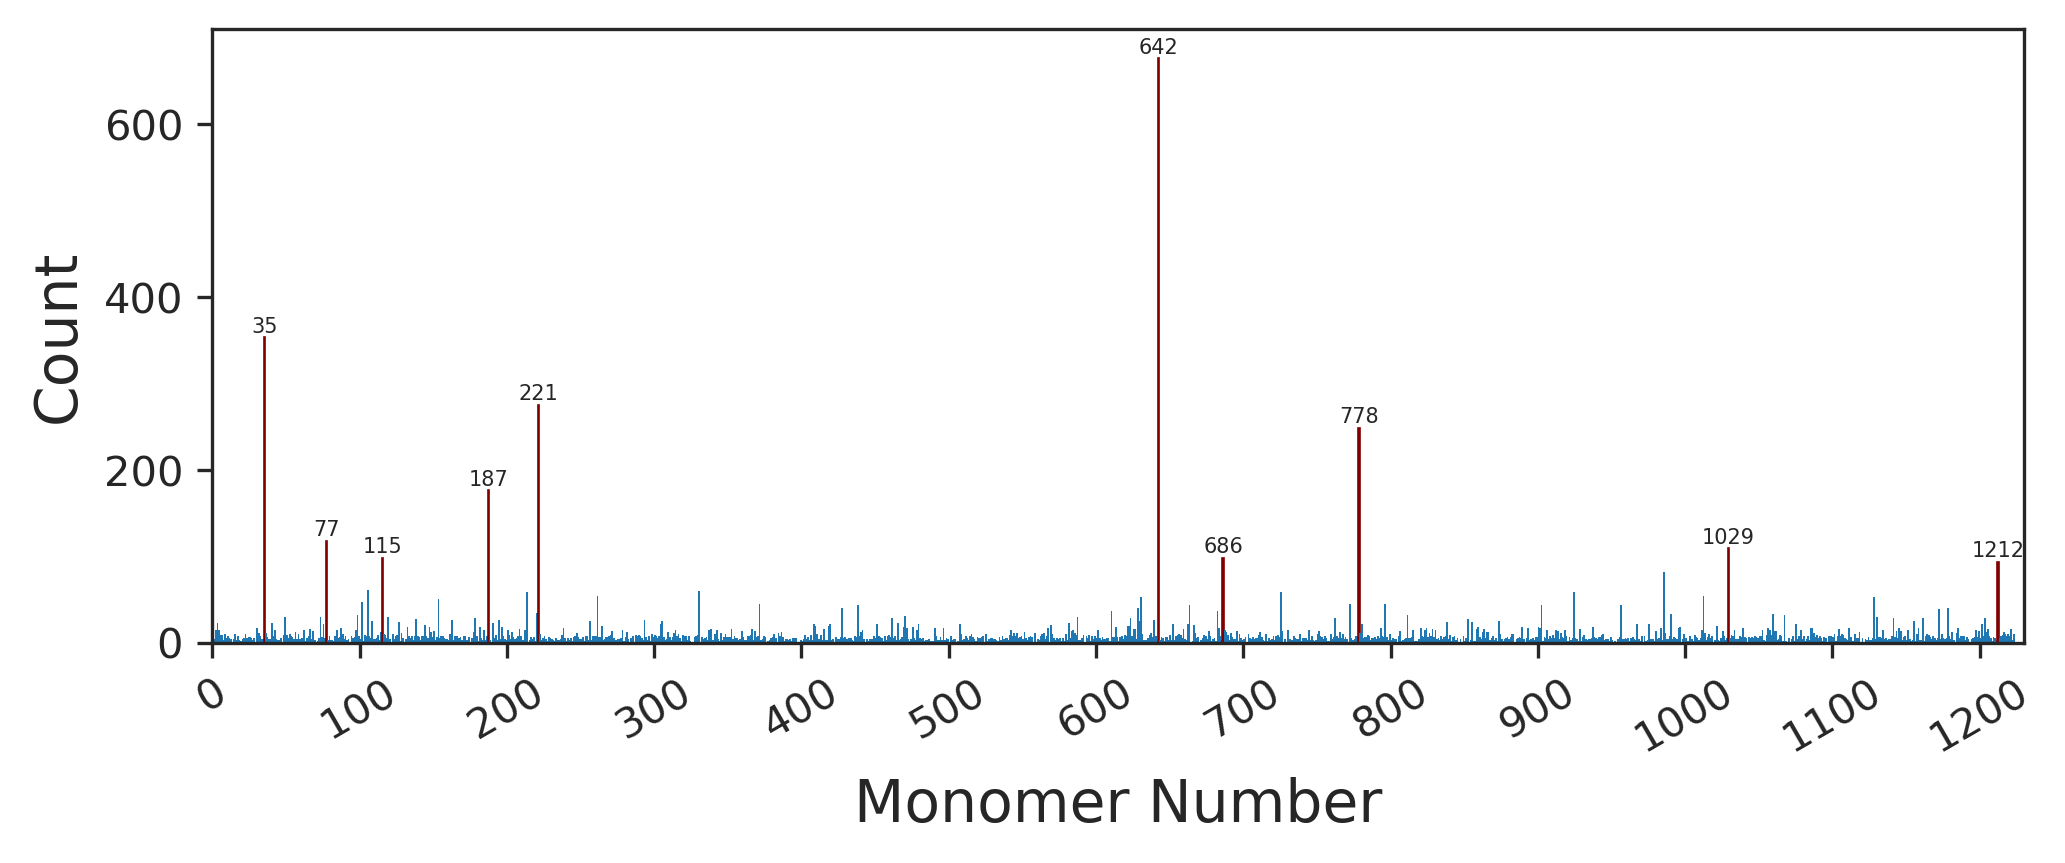

In [16]:
fig, ax = plt.subplots(1, 1, figsize = (7,3), dpi = 300,  facecolor='w', edgecolor='k')
sns.set_style("white", {'xtick.bottom': True, 'ytick.left': True})
sns.histplot(data = monomers_dist, ax = ax, binwidth=1, color='tab:blue', shrink=1.2, alpha=1)
ax.set_xticks(np.arange(0,1226,100))
ax.set_xlim(0,1230)
ax.set_xticklabels(np.arange(0,1225,100),rotation=30)
ax.set_xlabel('Monomer Number', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

top_monomers = []
for p in ax.patches:
    x, w, h = p.get_x(), p.get_width(), p.get_height()
    if h > 90:
        ax.text(x + w / 2, h, f'{x:.0f}\n', ha='center', va='center', size=5)
        p.set(color='maroon', alpha=1, linewidth=0.4)
        top_monomers.append(int(x))
    else:
        p.set(linewidth=0)

plt.tight_layout()
plt.savefig('../figures/common_monomers.png')
plt.show()